# 0) Necessary Imports & Installations

In [ ]:
pip install pydub

In [ ]:
# Import the necessary libraries

import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import moviepy.editor

from pydub import AudioSegment

from google.colab.patches import cv2_imshow

# 1) Loading the Dataset

In [1]:
# Mount the drive into this notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the dataset and extract the content

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NNFL Project/Datasets/Video_Speech_Actor_01.zip")
zip_ref.extractall()
zip_ref.close()

# 2) Extracting Video and Audio from the samples

In [ ]:
# Function to capture individual frames present in a video

def FrameCapture(path):
  frames = []

  vidObj = cv2.VideoCapture(path)

  count = 0

  success = 1

  while success:
    success, image = vidObj.read()

    if success == False:
      break

    # Converts the image frame into grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resizes the image to the dimensions as required by the pre-trained model
    image = cv2.resize(image, (64, 64))

    # Further necessary image transformations
    image = np.dstack([image]*3 )
    image = np.expand_dims(image, axis=0)

    # To store each frame into one large 'frames' list
    frames.append(image)
    count += 1

  return frames

In [ ]:
# Function to extract audio from a given audio-visual file

import moviepy.editor as mp

def ExtractAudio(path):
	# Insert Local Video File Path
	clip = mp.VideoFileClip(path)

 	# Insert Local Audio File Path
	clip.audio.write_audiofile(path.split(".")[0] + ".mp3")

	# Paths for mp3 and wav files
	input_file = (path.split(".")[0] + ".mp3")
	output_file = path.split(".")[0] + ".wav"

	# convert mp3 file to wav file
	sound = AudioSegment.from_mp3(input_file)
	sound.export(output_file, format = "wav")


In [ ]:
# Function to extract mfcc features from audio samples

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
# Iterate through each directory and store the path of each file

paths = []
labels = []
for dirname, _, filenames in os.walk('/content/Actor_01'):
    counter = 0
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        counter = counter + 1
        if(counter == 60):
            break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[0]

'/content/Actor_01/01-01-07-02-02-02-01.mp4'

In [ ]:
# Store the frames of all the 60 videos

frames_dir = []

for i in range(len(paths)):
  frames = FrameCapture(paths[i])

  frames_dir.append(frames)

len(frames_dir)

60

In [ ]:
# Extract video from each audio file

for i in range(len(paths)):
	ExtractAudio(paths[i])

MoviePy - Writing audio in /content/Actor_01/01-01-07-02-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-05-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-08-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-08-02-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-04-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-02-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-08-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-03-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-08-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-06-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-05-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-08-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-03-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-02-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-02-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-02-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-04-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-06-02-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-04-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-05-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-05-02-02-02-01.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/Actor_01/02-01-06-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-03-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-06-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-03-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-04-02-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-02-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-07-02-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-01-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-08-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-07-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-01-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-03-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-03-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-04-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-08-02-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-05-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-04-02-01-01-01.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/Actor_01/02-01-05-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-07-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-03-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-06-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-06-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-03-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-01-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-08-02-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-07-02-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-07-02-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-04-02-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-04-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-07-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-05-02-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-07-01-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-07-02-01-02-01.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/Actor_01/01-01-08-02-01-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/02-01-01-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-06-01-01-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-08-01-02-01-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-07-01-02-02-01.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/Actor_01/01-01-02-01-01-02-01.mp3


MoviePy - Done.


In [ ]:
# Function to make a dataframe of audio file paths

import pandas as pd

df = pd.DataFrame()

Y = []

for i in range(len(paths)):
  Y.append(paths[i].split(".")[0] + ".wav")

df['speech'] = Y

In [ ]:
# Function call to extract the mfcc features from each audio file path present in the dataframe df

X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

# Converting the dataframe list into a numpy array

X = [x for x in X_mfcc]
X = np.array(X)
X.shape

# Necessary size transformations for passing to the model

X = np.expand_dims(X, -1)

# Uncomment this when testing out a single sound sample
# X = np.expand_dims(X, axis=0)

X[0].shape

(40, 1)

# 3) Loading Models

In [ ]:
# Loading pre-trained models

model_images = tf.keras.models.load_model('/content/drive/MyDrive/NNFL Project/Models/final_model_Custom.h5')

model_speech = tf.keras.models.load_model('/content/drive/MyDrive/NNFL Project/Models/final_model_speechRecognition.h5')

#4) Model Predictions

In [ ]:
# Storing the video frame predictions in a probability array and finding out the average prediction throughout the video!

img_no = 1

avg_prob = np.zeros((1, 7))
probs_video = []

for i in range(len(frames_dir[img_no])):
  pred = model_images.predict_step(frames_dir[img_no][i])/len(frames_dir[img_no])
  probs_video.append(pred)
  avg_prob += pred


len(probs_video)

122

In [ ]:
avg_prob

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[2.2279166e-01, 2.4094973e-18, 1.1471986e-01, 9.9663129e-03,
        6.4814612e-02, 5.8770722e-01, 2.1219289e-08]], dtype=float32)>

In [ ]:
paths[img_no]

'/content/Actor_01/02-01-05-02-01-01-01.mp4'

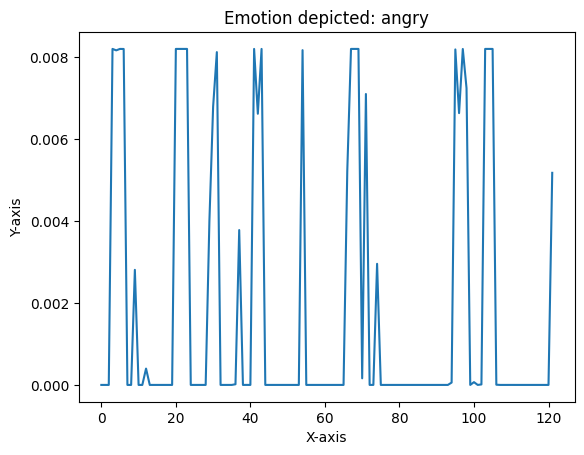

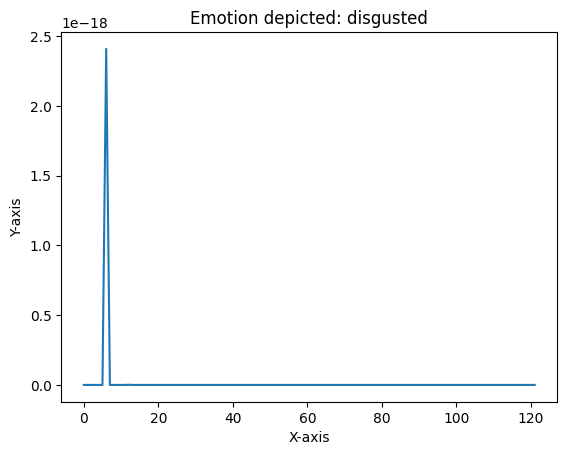

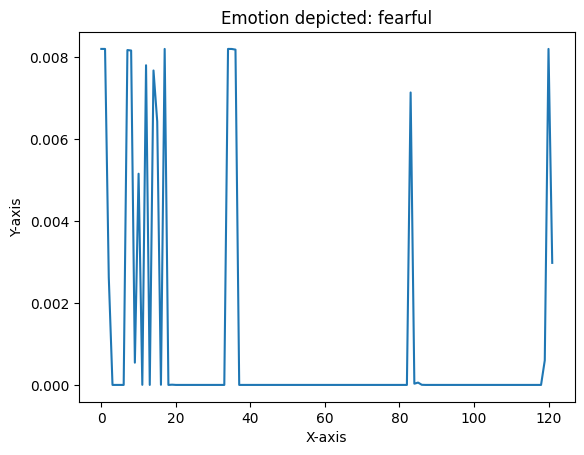

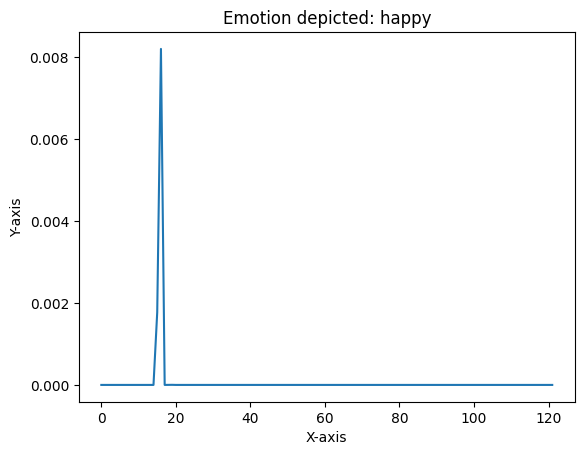

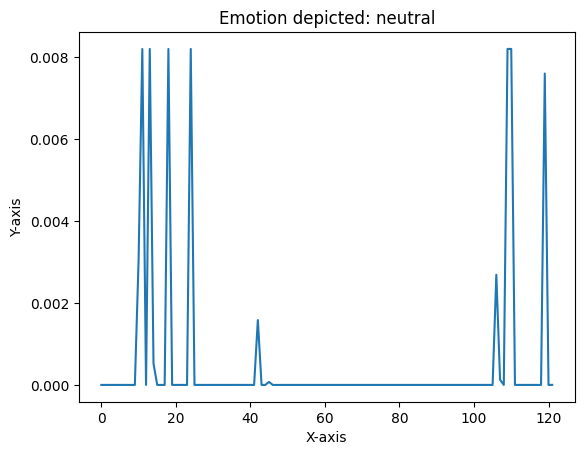

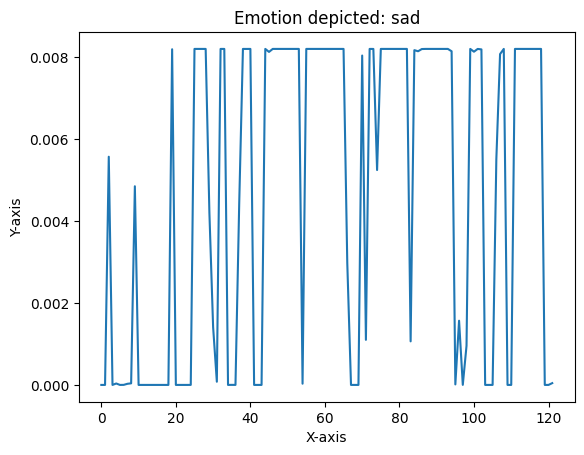

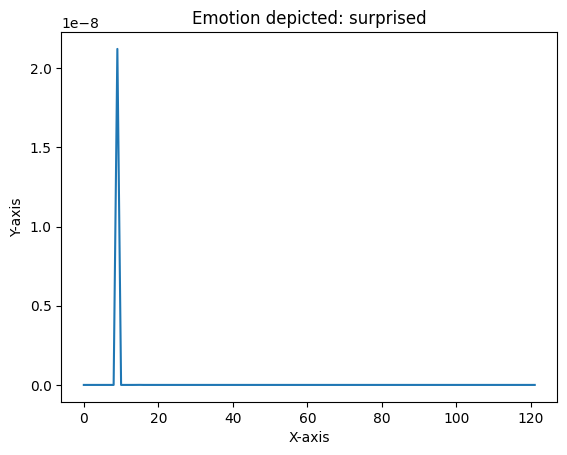

In [ ]:
class_labels = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Plotting te probability distributions of the different frames of a video
# Helps us in undertanding the different emotions depicted by a human in real-time
# For eg, the below plot corresponds to the emotion: "frustration"
for i in range(7):
  prob_array = []

  for j in range(len(probs_video)):
    prob_array.append(probs_video[j][0][i])

  plt.plot(range(len(probs_video)), prob_array)

  # Add labels and a legend
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Emotion depicted: ' + class_labels[i])

  # Show the plot
  plt.show()

In [ ]:
X_ = X[img_no]
X_ = np.expand_dims(X_, axis=0)

X_.shape

(1, 40, 1)

In [ ]:
model_speech.predict_step(X_)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[2.7235621e-04, 5.5645109e-04, 9.5245745e-03, 4.2171041e-06,
        9.8962295e-01, 5.5495656e-07, 1.8884617e-05]], dtype=float32)>